# WOCE temperature section

## (with multiple colormaps)

In [1]:
import iris

iris.FUTURE.netcdf_promote = True

url = 'http://icdc.cen.uni-hamburg.de/thredds/dodsC/ftpthredds/woce/wghc_params.nc'

cubes = iris.load_raw(url)
print(cubes)

0: Tpoten / (degrees C)                (ZAX: 44; latitude: 341; longitude: 720)
1: Sig0 / (kg/m3)                      (ZAX: 44; latitude: 341; longitude: 720)
2: Temp / (degrees C)                  (ZAX: 44; latitude: 341; longitude: 720)
3: Sig4 / (kg/m3)                      (ZAX: 44; latitude: 341; longitude: 720)
4: Sig2 / (kg/m3)                      (ZAX: 44; latitude: 341; longitude: 720)
5: Oxygen / (micromole/kg)             (ZAX: 44; latitude: 341; longitude: 720)
6: Pres / (decibars)                   (ZAX: 44; latitude: 341; longitude: 720)
7: Phosph / (micromole/kg)             (ZAX: 44; latitude: 341; longitude: 720)
8: Silicate / (micromole/kg)           (ZAX: 44; latitude: 341; longitude: 720)
9: Nitrate / (micromole/kg)            (ZAX: 44; latitude: 341; longitude: 720)
10: Salinity / (1)                      (ZAX: 44; latitude: 341; longitude: 720)
11: Gamman / (kg/m3)                    (ZAX: 44; latitude: 341; longitude: 720)
12: Bot_Dep / (m)                     

In [2]:
tpoten = cubes.extract_strict('Tpoten')
sig0 = cubes.extract_strict('Sig0')

In [3]:
tpoten = tpoten.extract(
    iris.Constraint(longitude=lambda cell: 334 <= cell < 334.5)
)

sig0 = sig0.extract(
    iris.Constraint(longitude=lambda cell: 334 <= cell < 334.5)
)

y = tpoten.coord(axis='Y').points
z = tpoten.coord(axis='Z').points

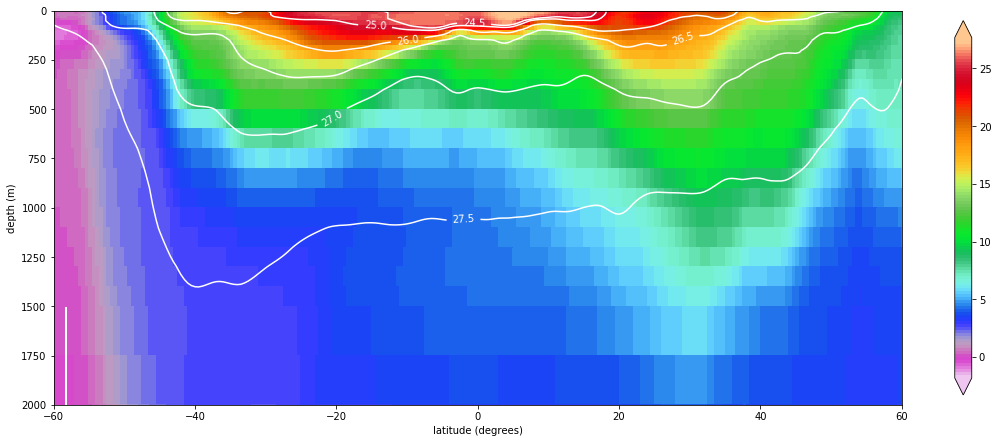

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from oceans.colormaps import cm


cmap = cm.odv

fig, ax = plt.subplots(figsize=(19, 7.25))
cs = ax.pcolormesh(y, z, tpoten.data, cmap=cmap)
ax.set_ylim(0, 2000)
ax.set_xlim(-60, 60)
ax.invert_yaxis()
ax.set_ylabel('depth (m)')
ax.set_xlabel('latitude (degrees)')

fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both')

levels = [24.5, 25, 26, 26.5, 27, 27.5]
clabel = ax.contour(y, z, sig0.data, colors='w', levels=levels)
t = ax.clabel(clabel, fmt=r'%.1f')

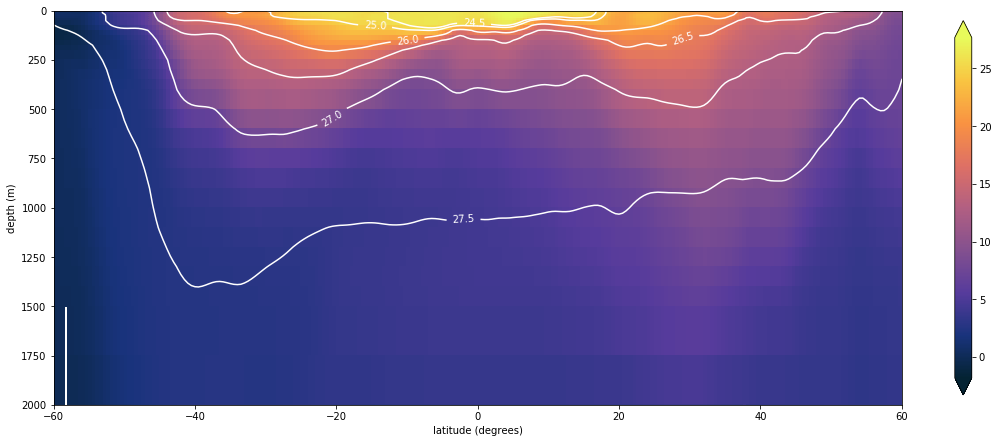

In [5]:
import palettable


cmap = palettable.cmocean.sequential.Thermal_9.mpl_colormap

fig, ax = plt.subplots(figsize=(19, 7.25))
cs = ax.pcolormesh(y, z, tpoten.data, cmap=cmap)
ax.set_ylim(0, 2000)
ax.set_xlim(-60, 60)
ax.invert_yaxis()
ax.set_ylabel('depth (m)')
ax.set_xlabel('latitude (degrees)')

fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both')

levels = [24.5, 25, 26, 26.5, 27, 27.5]
clabel = ax.contour(y, z, sig0.data, colors='w', levels=levels)
t = ax.clabel(clabel, fmt=r'%.1f')

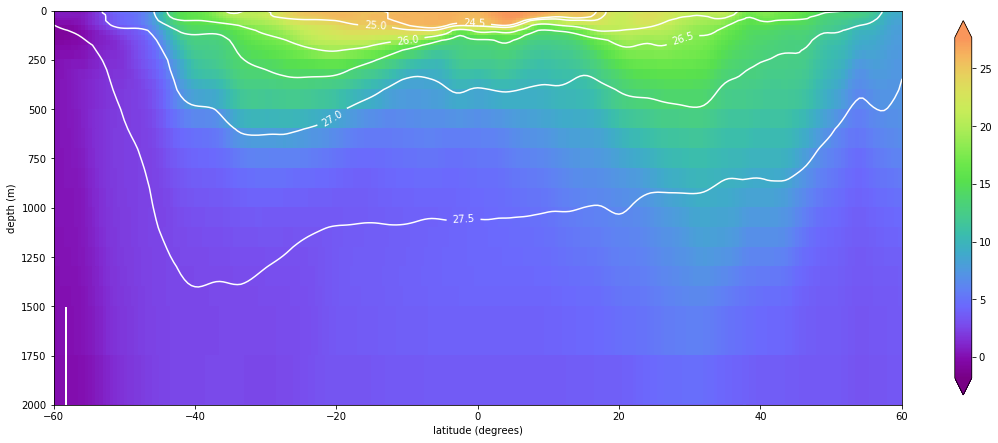

In [6]:
cmap = palettable.mycarta.Cube1_20.mpl_colormap

fig, ax = plt.subplots(figsize=(19, 7.25))
cs = ax.pcolormesh(y, z, tpoten.data, cmap=cmap)
ax.set_ylim(0, 2000)
ax.set_xlim(-60, 60)
ax.invert_yaxis()
ax.set_ylabel('depth (m)')
ax.set_xlabel('latitude (degrees)')

fig.colorbar(cs, orientation='vertical', shrink=0.95, fraction=0.15, extend='both')

levels = [24.5, 25, 26, 26.5, 27, 27.5]
clabel = ax.contour(y, z, sig0.data, colors='w', levels=levels)
t = ax.clabel(clabel, fmt=r'%.1f')